<a href="https://colab.research.google.com/github/AmrSakkary/Retail_Analysis_using_Python/blob/main/budget_revenue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Retail Data:
This dataset encompasses details on sales transactions, salesperson profiles, product information, and the allocated budget for each specific period. It includes crucial attributes such as salesperson ID, product categories, and targeted budget values, offering a comprehensive view of retail operations and financial planning.

### Analysis purpose:

* Evaluat the sales teams and checking when was the target budget met.

* Check top managers' performance

* Check top products based on sales and quantity ordered.

    

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style('darkgrid')

## Data Cleaning Phase

In [ ]:
# function to clean the budget table
# and set it to the right format
def clean_budget(sheet_no):
    if sheet_no == 0:
        year = 2019
    elif sheet_no == 1:
        year = 2020
    else:
        year = 2021
    # loading the data
    budget = pd.read_excel('raw_data/Budget.xlsx', sheet_name=[sheet_no],
                            skiprows=2,
                            header=[0],
                            )
    # transforming
    budget = (budget[sheet_no].drop(index = 12, columns = 'Unnamed: 13')
            .melt(id_vars='SalespersonID',
                  value_name= 'budget_amount',
                  var_name='month'
                  )
            .dropna()
            )
    # creating date column using year and month
    budget['year'] = year
    budget['date'] = budget.year.astype('str') + '-' + budget.month.astype('str')
    budget.date = pd.to_datetime(budget.date)
    budget['quarter'] = budget.date.dt.quarter

    # final data table
    budget = budget[['SalespersonID', 'date', 'budget_amount', 'year', 'quarter']]

    return budget

In [ ]:
budget_data = pd.concat(
    [clean_budget(0), clean_budget(1), clean_budget(2)],
    axis = 0
)

budget_data.head()

,SalespersonID,date,budget_amount,year,quarter
1,125,2019-01-01,9016.031000,2019,1
2,144,2019-01-01,9870.923721,2019,1
3,183,2019-01-01,1394.216707,2019,1
5,196,2019-01-01,2270.020511,2019,1
6,215,2019-01-01,5347.775816,2019,1


In [ ]:
budget_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241 entries, 1 to 35
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   SalespersonID  241 non-null    object        
 1   date           241 non-null    datetime64[ns]
 2   budget_amount  241 non-null    float64       
 3   year           241 non-null    int64         
 4   quarter        241 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 11.3+ KB


In [ ]:
sales = pd.read_excel('/content/SalesData.xlsx', skiprows=4)

In [ ]:
sales.OrderDate = pd.to_datetime(sales.OrderDate)

In [ ]:
sales = sales.assign(
    total_revenue = sales.Quantity * sales.UnitPrice,
    year = sales.OrderDate.dt.year,
    quarter = sales.OrderDate.dt.quarter
)

sales.head(2)

,OrderDate,OrderNumber,ProductKey,SalespersonKey,Salesperson,Supervisor,Manager,Channel,Quantity,UnitPrice,total_revenue,year,quarter
0,2019-01-12,1492762,1420,265,Julio Lima,Diogo Carvalho,Gabriel Azevedo,Distributor,6,4.44,26.64,2019,1
1,2019-01-12,1492762,1073,265,Julio Lima,Diogo Carvalho,Gabriel Azevedo,Distributor,6,8.83,52.98,2019,1


In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260096 entries, 0 to 260095
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   OrderDate       260096 non-null  datetime64[ns]
 1   OrderNumber     260096 non-null  int64         
 2   ProductKey      260096 non-null  int64         
 3   SalespersonKey  260096 non-null  int64         
 4   Salesperson     260096 non-null  object        
 5   Supervisor      260096 non-null  object        
 6   Manager         260096 non-null  object        
 7   Channel         260096 non-null  object        
 8   Quantity        260096 non-null  int64         
 9   UnitPrice       260096 non-null  float64       
 10  total_revenue   260096 non-null  float64       
 11  year            260096 non-null  int64         
 12  quarter         260096 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(4)
memory usage: 25.8+ MB


In [ ]:
product = pd.read_excel('Product.xlsx')

In [ ]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               798 non-null    int64 
 1   ProductName      798 non-null    object
 2   ProductGroup     798 non-null    object
 3   ProductCategory  798 non-null    object
dtypes: int64(1), object(3)
memory usage: 25.1+ KB


In [ ]:
# Clean tables
budget_data.to_csv('budget.csv')
sales.to_csv('sales.csv')
product.to_csv('product.csv')

#### Extracting a SalesPerson table to evaluate the channels/managers well.


In [ ]:
sales_person = sales[['SalespersonKey',
                      'Salesperson',
                      'Supervisor',
                      'Manager',
                      'Channel']].drop_duplicates(subset = 'SalespersonKey')
sales_person.head()

,SalespersonKey,Salesperson,Supervisor,Manager,Channel
0,265,Julio Lima,Diogo Carvalho,Gabriel Azevedo,Distributor
17,144,Felipe Goncalves,Sofia Ribeiro,Gabriel Azevedo,Online
25,215,Carla Ferreira,Diego Araujo,Victor Castro,Retail
50,196,Leonardo Cardoso,Diego Araujo,Victor Castro,Retail
61,125,Gustavo Gomes,Diogo Carvalho,Gabriel Azevedo,Distributor


#### Creating Tables that contains sales person info and budget

In [ ]:
salesperson_budget = budget_data.merge(sales_person, left_on = 'SalespersonID', right_on = 'SalespersonKey')
salesperson_budget = salesperson_budget.drop('SalespersonKey', axis = 1)
salesperson_budget.head()

,SalespersonID,date,budget_amount,year,quarter,Salesperson,Supervisor,Manager,Channel
0,125,2019-01-01,9016.031000,2019,1,Gustavo Gomes,Diogo Carvalho,Gabriel Azevedo,Distributor
1,125,2019-02-01,12635.710568,2019,1,Gustavo Gomes,Diogo Carvalho,Gabriel Azevedo,Distributor
2,125,2019-03-01,3975.959267,2019,1,Gustavo Gomes,Diogo Carvalho,Gabriel Azevedo,Distributor
3,125,2019-04-01,35418.687607,2019,2,Gustavo Gomes,Diogo Carvalho,Gabriel Azevedo,Distributor
4,125,2019-05-01,67254.905958,2019,2,Gustavo Gomes,Diogo Carvalho,Gabriel Azevedo,Distributor


In [ ]:
budget_data.shape, salesperson_budget.shape

((241, 5), (241, 9))

### Data is clean now, lets start checking some performance across different categories of sales employees



#### Evaluating the sales teams and checking when was the target budget met
>Tracking when was the target budget satisfied to help identify high-performing periods or areas that may need improvement.

In [ ]:
# creating column to identify each quarter for each year
salesperson_budget['year_quarter'] = (salesperson_budget.year.astype('str') + '_Q' +
                                      salesperson_budget.quarter.astype('str')
                                      )

sales['year_quarter'] = (sales.year.astype('str') + '_Q' +
                                      sales.quarter.astype('str')
                                      )

#### Checking the overall difference between revenue and budget for each year.

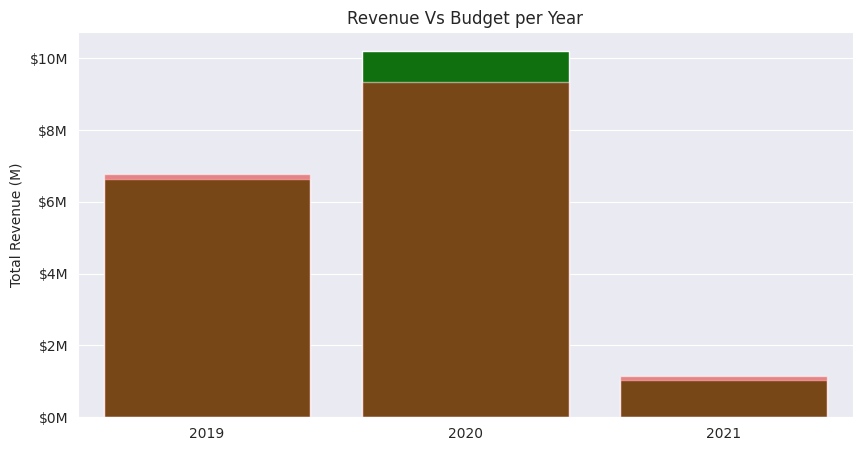

In [ ]:
# revenue per year
fig , ax = plt.subplots(figsize=(10,5),ncols=1, sharex=True, sharey=True )

sns.barplot(
    data = sales,
    x = 'year',
    y = 'total_revenue',
    errorbar=None,
    estimator='sum',
    hue = 'year',
    palette = ['g', 'g', 'g'],
    legend = False,
    ax = ax,
    label = 'Total Revenue'
)
# budget required per year
sns.barplot(
    data = salesperson_budget,
    x = 'year',
    y = 'budget_amount',
    errorbar=None,
    estimator='sum',
    alpha = .5,
    hue = 'year',
    palette = ['r', 'r', 'r'],
    legend = False,
    ax = ax,
    label = 'Budget Threshold'
)
plt.title('Revenue Vs Budget per Year')
lables = [str(i).replace(f"{i}", f'${i}M') for i in np.arange(0, 12, 2 )]
plt.setp(ax, yticks=1000_000*np.arange(0, 12, 2 ), yticklabels=lables)
plt.xlabel('')
plt.ylabel('Total Revenue (M)');
# plt.legend(['Total Revenue', 'Budget Threshold'])

#### Checking the overall difference between revenue and budget for each Quarter.

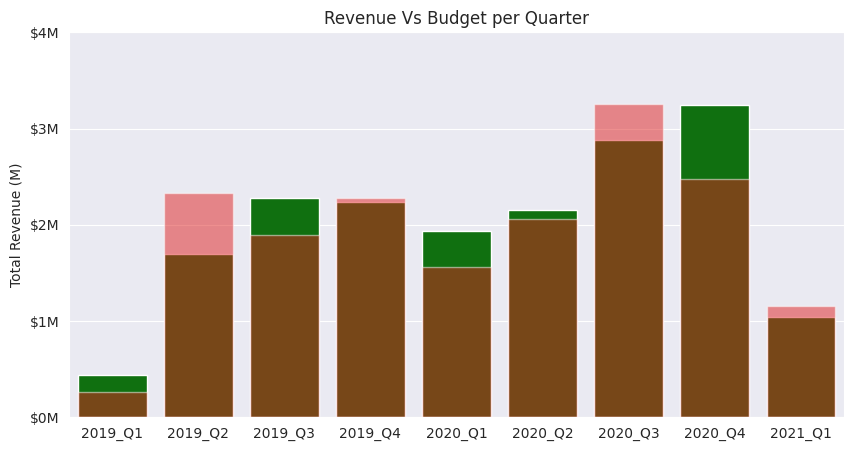

In [ ]:

# revenue per Quarter
fig , ax = plt.subplots(figsize=(10,5),ncols=1, sharex=True, sharey=True )

sns.barplot(
    data = sales,
    x = 'year_quarter',
    y = 'total_revenue',
    errorbar=None,
    estimator='sum',
    hue = 'year',
    palette = ['g', 'g', 'g'],
    legend = False,
    ax = ax,
    label = 'Total Revenue'
)
# budget required per Quarter
sns.barplot(
    data = salesperson_budget,
    x = 'year_quarter',
    y = 'budget_amount',
    errorbar=None,
    estimator='sum',
    alpha = .5,
    hue = 'year',
    palette = ['r', 'r', 'r'],
    legend = False,
    ax = ax,
    label = 'Budget Threshold'
)
plt.title('Revenue Vs Budget per Quarter')
lables = [str(i).replace(f"{i}", f'${i}M') for i in np.arange(0, 5, 1 )]
plt.setp(ax, yticks=1000_000*np.arange(0, 5, 1 ), yticklabels=lables)
plt.xlabel('')
plt.ylabel('Total Revenue (M)');
# plt.legend(['Total Revenue', 'Budget Threshold'])

* Quarter 1 got a high performance in each year except for 2021

* 2019 had a higher revenue per quarter, but it didn't catch the expectations of the budget in Quarter 2

* 2020 was a great year compared to 2019 as it was able to achieve the target in 3 quarters and overall higher revenue

#### Checking the performance per channel




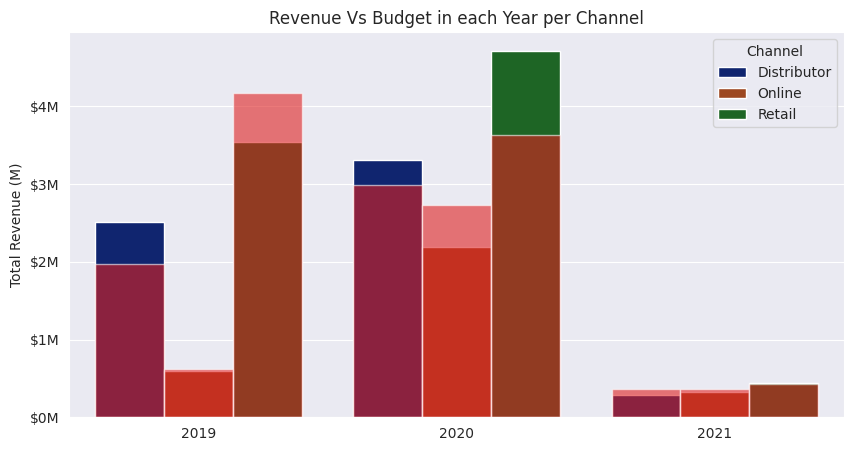

In [ ]:
fig , ax = plt.subplots(figsize=(10,5),ncols=1, sharex=True, sharey=True )

sns.barplot(
    data = sales,
    x = 'year',
    y = 'total_revenue',
    errorbar=None,
    estimator='sum',
    hue = 'Channel',
    hue_order = sales.Channel.unique().tolist(),
    palette = sns.color_palette('dark')[:3],
    # legend = False,
    ax = ax
)
# budget required per Quarter
sns.barplot(
    data = salesperson_budget,
    x = 'year',
    y = 'budget_amount',
    errorbar=None,
    estimator='sum',
    alpha = .6,
    hue = 'Channel',
    hue_order = sales.Channel.unique().tolist(),
    palette = ['r', 'r', 'r'],
    legend = False,
    ax = ax
)
plt.title('Revenue Vs Budget in each Year per Channel')
lables = [str(i).replace(f"{i}", f'${i}M') for i in np.arange(0, 5, 1 )]
plt.setp(ax, yticks=1000_000*np.arange(0, 5, 1 ), yticklabels=lables)
plt.xlabel('')
plt.ylabel('Total Revenue (M)');

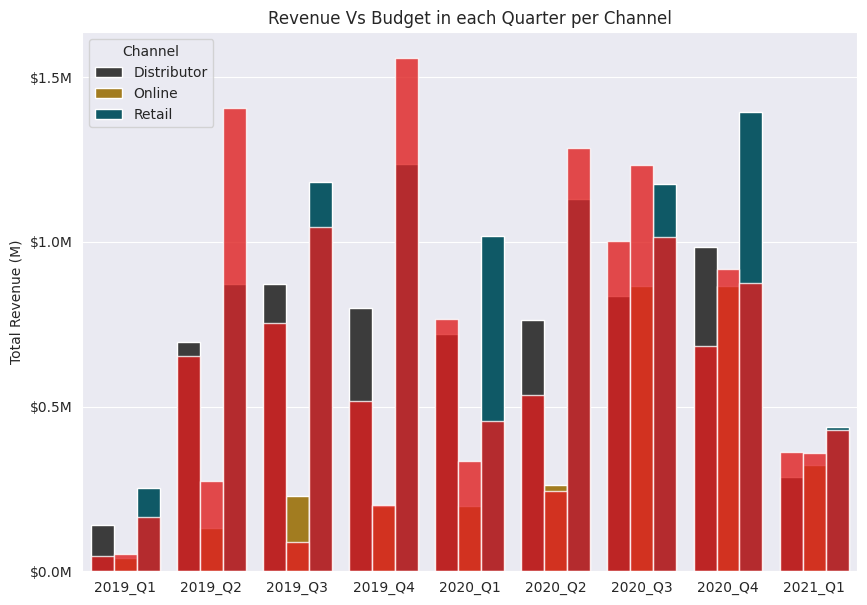

In [ ]:
fig , ax = plt.subplots(figsize=(10,7),ncols=1, sharex=True, sharey=True )

sns.barplot(
    data = sales,
    x = 'year_quarter',
    y = 'total_revenue',
    errorbar=None,
    estimator='sum',
    hue = 'Channel',
    hue_order = sales.Channel.unique().tolist(),
    palette = sns.color_palette('dark')[-3:],
    # legend = False,
    ax = ax
)
# budget required per Quarter
sns.barplot(
    data = salesperson_budget,
    x = 'year_quarter',
    y = 'budget_amount',
    errorbar=None,
    estimator='sum',
    alpha = .8,
    hue = 'Channel',
    hue_order = sales.Channel.unique().tolist(),
    palette = ['r', 'r', 'r'],
    legend = False,
    ax = ax
)
plt.title('Revenue Vs Budget in each Quarter per Channel')
lables = [str(i).replace(f"{i}", f'${i}M') for i in np.arange(0, 2, .5 )]
plt.setp(ax, yticks=1000_000*np.arange(0, 2, .5 ), yticklabels=lables)
plt.xlabel('')
plt.ylabel('Total Revenue (M)');

* Overall the distributor channel had a better score
the drop in 2020 might be caused by covid19 impact

* The online channel is not meeting the budget target all the time but overall it had a great jump in revenue from 2019 to 2020

* The retail channel had a good achievement but it is usually down in quarter 2

#### Investigating the revenue achieved for each management level

##### Managers Level

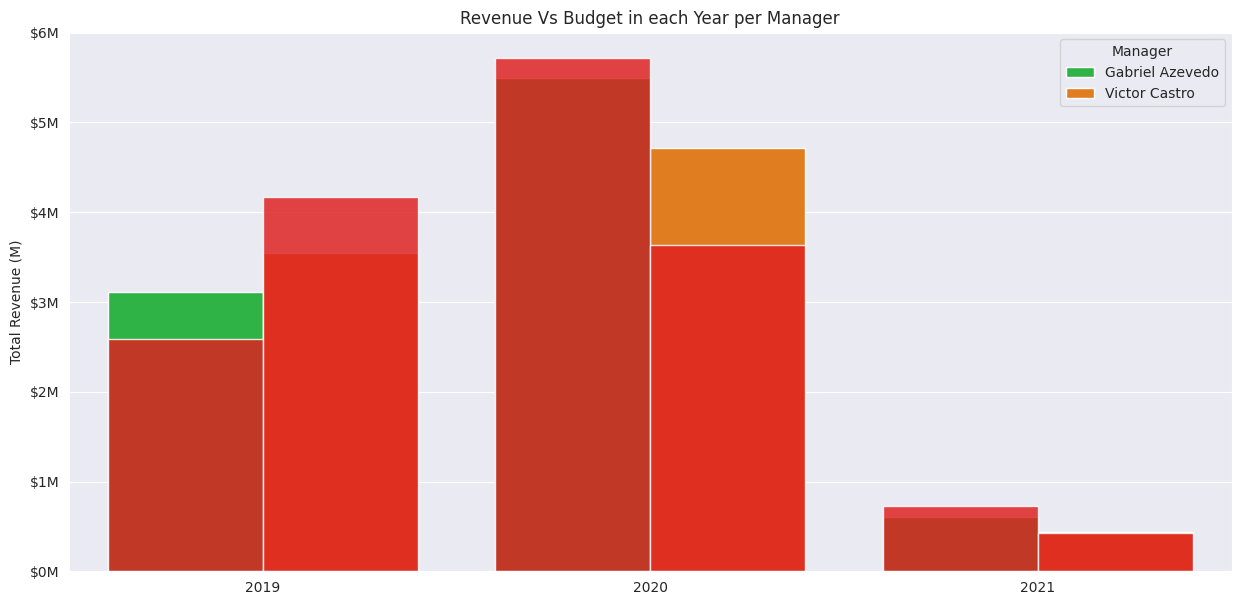

In [ ]:
# revenue per year
fig , ax = plt.subplots(figsize=(15,7),ncols=1, sharex=True, sharey=True )

sns.barplot(
    data = sales,
    x = 'year',
    y = 'total_revenue',
    errorbar=None,
    estimator='sum',
    hue = 'Manager',
    hue_order = sales.Manager.unique().tolist(),
    palette = [sns.color_palette("bright")[2], sns.color_palette("bright")[1]],
    ax = ax
)
# budget required per year
sns.barplot(
    data = salesperson_budget,
    x = 'year',
    y = 'budget_amount',
    errorbar=None,
    estimator='sum',
    hue = 'Manager',
    hue_order = sales.Manager.unique().tolist(),
    alpha = .84,
    palette = ['r', 'r'],
    legend = False,
    ax = ax
)
plt.title('Revenue Vs Budget in each Year per Manager')
lables = [str(i).replace(f"{i}", f'${i}M') for i in np.arange(0, 7, 1 )]
plt.setp(ax, yticks=1000_000*np.arange(0, 7, 1 ), yticklabels=lables)
plt.xlabel('')
plt.ylabel('Total Revenue (M)');

* Although Gabrial didn't meet the budget required for 2020 and early 2021, he still was quite close to the target.

* Victor didn't meet the allocated budget in 2019, yet he could achieve a higher revenue in the following year, and he hit the target in the early times of 2021, which might be a good indicator for a promising achievement in the upcoming quarters.

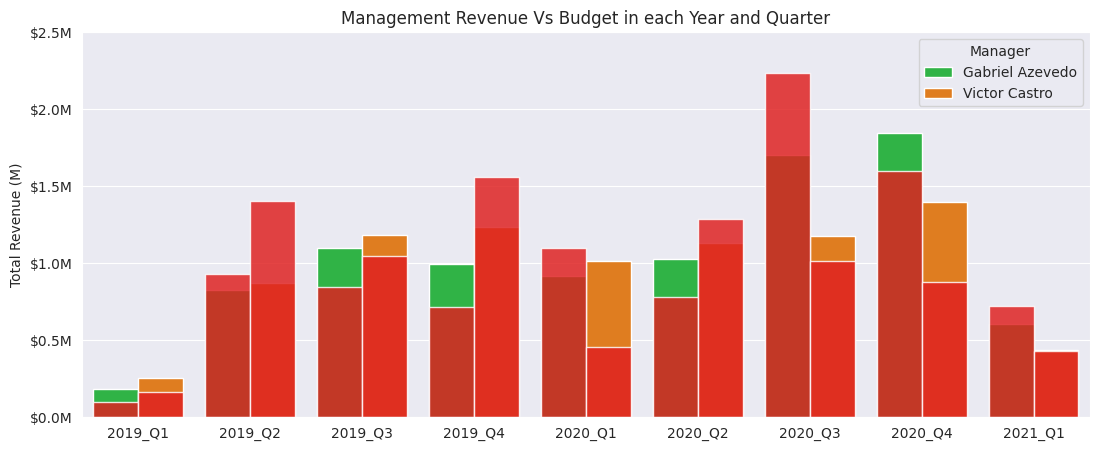

In [ ]:
# revenue per year and quarter
fig , ax = plt.subplots(figsize=(13,5),ncols=1, sharex=True, sharey=True )

sns.barplot(
    data = sales,
    x = 'year_quarter',
    y = 'total_revenue',
    errorbar=None,
    estimator='sum',
    hue = 'Manager',
    hue_order = sales.Manager.unique().tolist(),
    palette = [sns.color_palette("bright")[2], sns.color_palette("bright")[1]],
    ax = ax
)
# budget required per year and quarter
sns.barplot(
    data = salesperson_budget,
    x = 'year_quarter',
    y = 'budget_amount',
    errorbar=None,
    estimator='sum',
    hue = 'Manager',
    hue_order = sales.Manager.unique().tolist(),
    alpha = .84,
    palette = ['r', 'r'],
    legend = False,
    ax = ax
)
plt.title('Management Revenue Vs Budget in each Year and Quarter')
lables = [str(i).replace(f"{i}", f'${i}M') for i in np.arange(0, 3, .5 )]
plt.setp(ax, yticks=1000_000*np.arange(0, 3, .5 ), yticklabels=lables)
plt.xlabel('')
plt.ylabel('Total Revenue (M)');

* Gabriel and Victor have an interesting pattern, which is they are achieving the target in a quarter, and most likely the following quarter they don't meet the target

##### Supervisors Level

<ipython-input-428-f51921b32753>:16: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


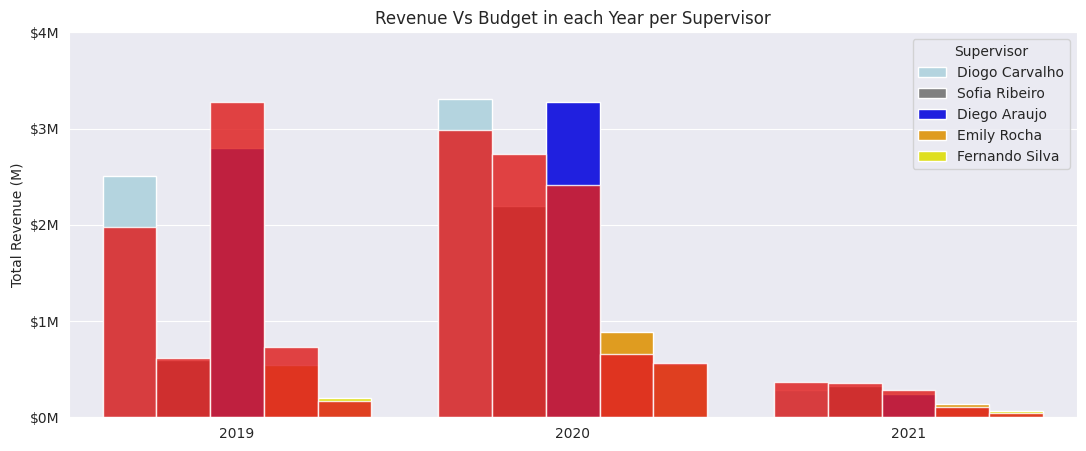

In [ ]:
# revenue per year
fig , ax = plt.subplots(figsize=(13,5),ncols=1, sharex=True, sharey=True )

sns.barplot(
    data = sales,
    x = 'year',
    y = 'total_revenue',
    errorbar=None,
    estimator='sum',
    hue = 'Supervisor',
    hue_order = sales.Supervisor.unique().tolist(),
    palette = ['lightblue', 'grey', 'blue', 'orange', 'yellow'],
    ax = ax
)
# budget required per year
sns.barplot(
    data = salesperson_budget,
    x = 'year',
    y = 'budget_amount',
    errorbar=None,
    estimator='sum',
    hue = 'Supervisor',
    hue_order = sales.Supervisor.unique().tolist(),
    alpha = .84,
    palette = ['r'],
    legend = False,
    ax = ax
)
plt.title('Revenue Vs Budget in each Year per Supervisor')
lables = [str(i).replace(f"{i}", f'${i}M') for i in np.arange(0, 5, 1 )]
plt.setp(ax, yticks=1000_000*np.arange(0, 5, 1 ), yticklabels=lables)
plt.xlabel('')
plt.ylabel('Total Revenue (M)');

<ipython-input-316-9a5526d415c8>:16: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


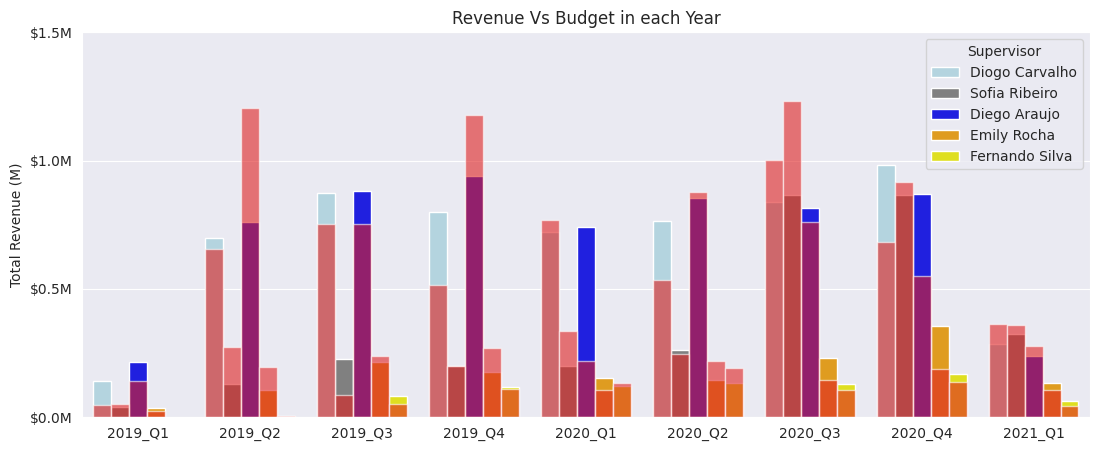

In [ ]:
# revenue per year and quarter
fig , ax = plt.subplots(figsize=(13,5),ncols=1, sharex=True, sharey=True )

sns.barplot(
    data = sales,
    x = 'year_quarter',
    y = 'total_revenue',
    errorbar=None,
    estimator='sum',
    hue = 'Supervisor',
    palette = ['lightblue', 'grey', 'blue', 'orange', 'yellow'],
    ax = ax,
    hue_order = sales.Supervisor.unique().tolist()
)
# budget required per year
sns.barplot(
    data = salesperson_budget,
    x = 'year_quarter',
    y = 'budget_amount',
    errorbar=None,
    estimator='sum',
    hue = 'Supervisor',
    alpha = .6,
    palette = ['r'],
    legend = False,
    hue_order = sales.Supervisor.unique().tolist(),
    ax = ax
)
plt.title('Revenue Vs Budget in each Year')
lables = [str(i).replace(f"{i}", f'${i}M') for i in np.arange(0, 2, .5 )]
plt.setp(ax, yticks=1000_000*np.arange(0, 2, .5 ), yticklabels=lables)
plt.xlabel('')
plt.ylabel('Total Revenue (M)');

* Diogo Carvalho had nice achievements over each quarter except for 2020 q3 and 2021 q1

* Diego Araujo had a few drops with the highest drop in 2019 q2 and q4 but he did catch up in most of his following quarters, his performance in the first quarter of 2020 was quite good

* Fernando Silva joined around the third quarter of 2019, but his profile is almost fully positive

* Sofia Ribeiro faced challenges in meeting budget targets across several quarters

###### Investigate the sales employees under the supervision of (Sofia Ribeiro) to see if we can identify where the problem of not meeting the target comes from

In [ ]:
Sofia_budget = salesperson_budget.query('Supervisor == "Sofia Ribeiro"')
Sofia_sales = sales.query('Supervisor == "Sofia Ribeiro"')

<ipython-input-429-a4fd14a777c9>:16: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


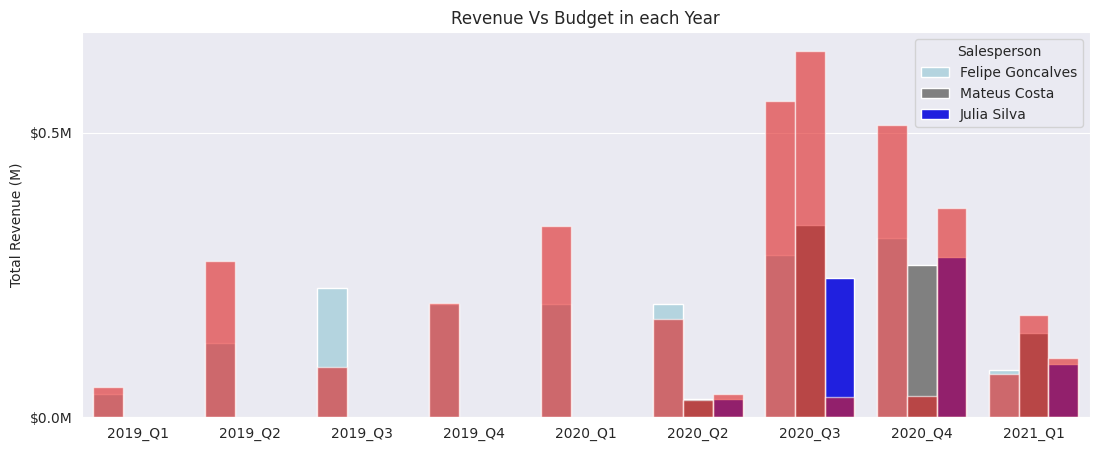

In [ ]:
# revenue per year and quarter
fig , ax = plt.subplots(figsize=(13,5),ncols=1, sharex=True, sharey=True )

sns.barplot(
    data = Sofia_sales,
    x = 'year_quarter',
    y = 'total_revenue',
    errorbar=None,
    estimator='sum',
    hue = 'Salesperson',
    palette = ['lightblue', 'grey', 'blue'],
    ax = ax,
    hue_order = Sofia_sales.Salesperson.unique().tolist()
)
# budget required per year and quarter
sns.barplot(
    data = Sofia_budget,
    x = 'year_quarter',
    y = 'budget_amount',
    errorbar=None,
    estimator='sum',
    hue = 'Salesperson',
    alpha = .6,
    palette = ['r'],
    legend = False,
    hue_order = Sofia_budget.Salesperson.unique().tolist(),
    ax = ax
)
plt.title('Revenue Vs Budget in each Year')
lables = [str(i).replace(f"{i}", f'${i}M') for i in np.arange(0, 1, .5 )]
plt.setp(ax, yticks=1000_000*np.arange(0, 1, .5 ), yticklabels=lables)
plt.xlabel('')
plt.ylabel('Total Revenue (M)');

* Felipe Goncalves had a low performance across the quarters except for the third quarter in 2019

* (Mateus Costa), and (Julia Silva) didn't have the best start, but they did perform quite well by the end of 2020

##### Who are the top 4 Salespeople based on revenue generated through all times?

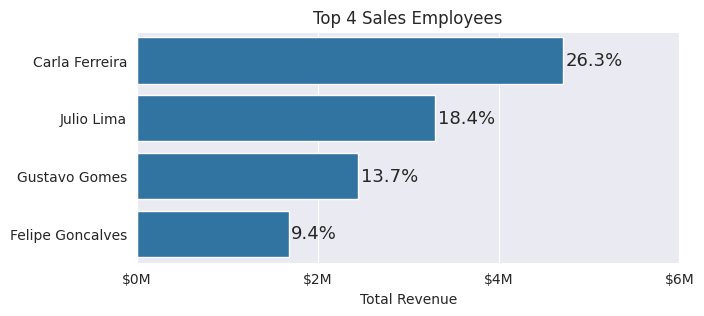

In [ ]:
salesperson_rank = (sales.groupby('Salesperson')
                        .total_revenue
                        .sum()
                        .sort_values(ascending = False)
                        .reset_index()
                        )

# contribution percent of the total revenue
salesperson_rank['rev_percent'] = (
    round(
        (salesperson_rank.total_revenue / salesperson_rank.total_revenue.sum() * 100)
        ,1
        )
    ).astype(str)+'%'


top4 = salesperson_rank.head(4)

plt.figure(figsize=(7, 3))
ax = sns.barplot(
    data = top4,
    x = 'total_revenue',
    y = 'Salesperson'
)
lables = [str(i).replace(f"{i}", f'${i}M') for i in np.arange(0, 7, 2 )]
plt.setp(ax, xticks=1000_000*np.arange(0, 7, 2 ), xticklabels=lables)

ax.bar_label(ax.containers[0], fontsize=13, labels =top4.rev_percent , padding = 2);

plt.title('Top 4 Sales Employees')
plt.ylabel('')
plt.xlabel('Total Revenue');

##### Who are the bottom 4 Salespeople based on revenue generated?

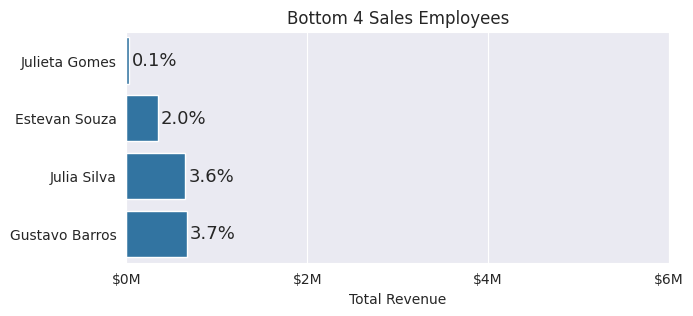

In [ ]:
bottom4 = salesperson_rank.tail(4).sort_values('total_revenue')

plt.figure(figsize=(7, 3))
ax = sns.barplot(
    data = bottom4,
    x = 'total_revenue',
    y = 'Salesperson'
)
lables = [str(i).replace(f"{i}", f'${i}M') for i in np.arange(0, 7, 2 )]
plt.setp(ax, xticks=1000_000*np.arange(0, 7, 2 ), xticklabels=lables)

ax.bar_label(ax.containers[0], fontsize=13, labels =bottom4.rev_percent , padding = 2);

plt.title('Bottom 4 Sales Employees')
plt.ylabel('')
plt.xlabel('Total Revenue');

### Moving to Products

#### What was the most ordered product category?

In [ ]:
sales_product = sales.merge(product, left_on = 'ProductKey', right_on = 'ID')
sales_product.head(2)

,OrderDate,OrderNumber,ProductKey,SalespersonKey,Salesperson,Supervisor,Manager,Channel,Quantity,UnitPrice,total_revenue,year,quarter,year_quarter,ID,ProductName,ProductGroup,ProductCategory
0,2019-01-12,1492762,1420,265,Julio Lima,Diogo Carvalho,Gabriel Azevedo,Distributor,6,4.44,26.64,2019,1,2019_Q1,1420,Product 1420,Coffee in Capsules,Food
1,2019-01-25,1498294,1420,196,Leonardo Cardoso,Diego Araujo,Victor Castro,Retail,12,4.39,52.68,2019,1,2019_Q1,1420,Product 1420,Coffee in Capsules,Food


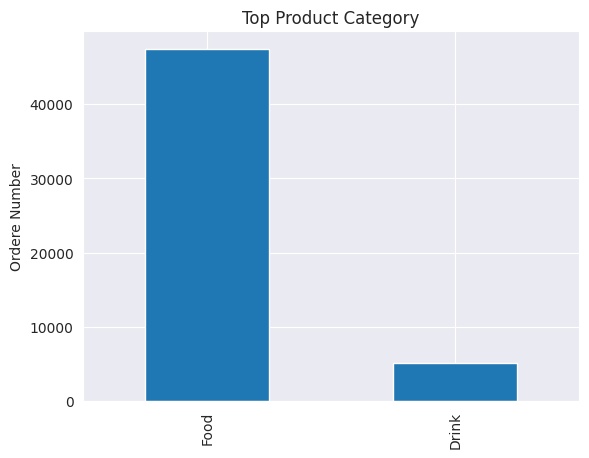

In [ ]:
(sales_product.drop_duplicates(subset = ['OrderNumber', 'ProductCategory'])
            .groupby(['ProductCategory'])
            .OrderNumber.count()
            .sort_values(ascending = False)
            .plot(kind = 'bar')
            );
plt.title('Top Product Category')
plt.ylabel('Ordere Number')
plt.xlabel('');

* It appears that the company is focused on food products as it is dominating the number of orders

#### What are the top 10 product Groups based on quantity sold?

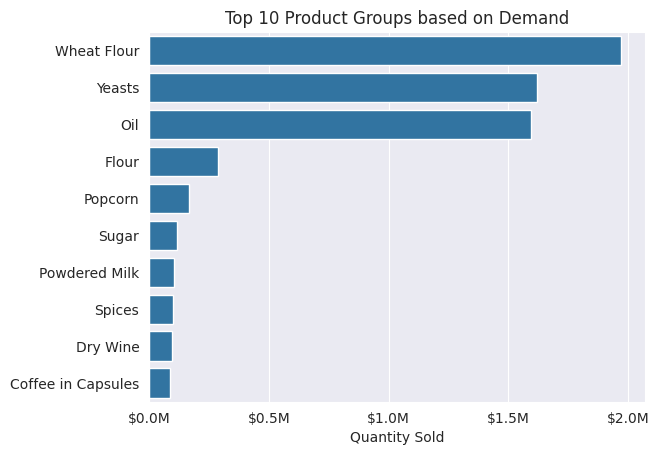

In [ ]:
product_group_ranks = sales_product.groupby(['ProductGroup'], as_index = False).Quantity.sum().sort_values('Quantity' ,ascending = False)
top10_prod_quantity = product_group_ranks.head(10)
ax = sns.barplot(
    data = top10_prod_quantity,
    y = 'ProductGroup',
    x = 'Quantity'
)

lables = [str(i).replace(f"{i}", f'${i}M') for i in np.arange(0, 2.5, .5 )]
plt.setp(ax, xticks=1000_000*np.arange(0, 2.5, .5 ), xticklabels=lables)


plt.title('Top 10 Product Groups based on Demand')
plt.ylabel('')
plt.xlabel('Quantity Sold');

#### What was the Top 10 Product Groups based on revenue?

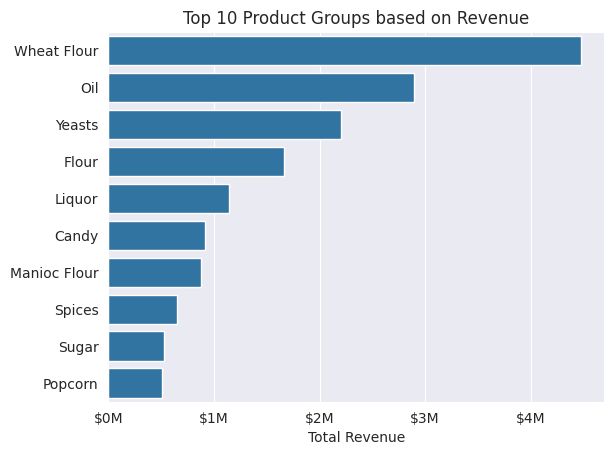

In [ ]:
product_group_ranks = sales_product.groupby(['ProductGroup'], as_index = False).total_revenue.sum().sort_values('total_revenue' ,ascending = False)
top10_prod_quantity = product_group_ranks.head(10)
ax = sns.barplot(
    data = top10_prod_quantity,
    y = 'ProductGroup',
    x = 'total_revenue'
)

lables = [str(i).replace(f"{i}", f'${i}M') for i in np.arange(0, 5, 1 )]
plt.setp(ax, xticks=1000_000*np.arange(0, 5, 1 ), xticklabels=lables)


plt.title('Top 10 Product Groups based on Revenue')
plt.ylabel('')
plt.xlabel('Total Revenue');

* Wheat Flour, Oil, and Yeast are producing the highest amount of revenue.

## Conclusion:

* 2020 was a great year for revenue, and the company achieved the target budget at the end of the year.

* 2021 q1 didn't meet expectations, so more responsibilities come in the upcoming quarters

* The distributor channel has a decrement in revenue in the first quarter of 2021, which needs to be taken care of

* The supervisor, Sofia needs to check her team's performance, specially Felipe Goncalves, also he is one of the top 4 best salespeople at generating revenue. He contributes with over 9% of the total revenue.

* Carl Ferreira, Julio Lima, Gustavo Gomes, and Felipe Goncalves should have some honor to increase their productivity even more.

* Check if the Drink product category can be improved by marketing the products